In [1]:
import numpy as np
from sympy import symbols, cos, sin, pi, Matrix, solve
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import math


In [2]:
# Defining unknown parameters in the figure
l1 = 2
l2 = 2

In [3]:
# Forward Kinematics
q3 = 2
q1 = math.acos((l1**2+l2**2-q3**2)/(2*l1*l2))
print('The passive joint angle q1 is:', np.rad2deg(q1))

The passive joint angle q1 is: 60.00000000000001


In [4]:
# Inverse Kinematics

q3 = math.sqrt(l1**2+l2**2-2*l1*l2*math.cos(q1))
print('The active joint length q3 is:', q3)


The active joint length q3 is: 2.0


### Visualization

<IPython.core.display.Javascript object>


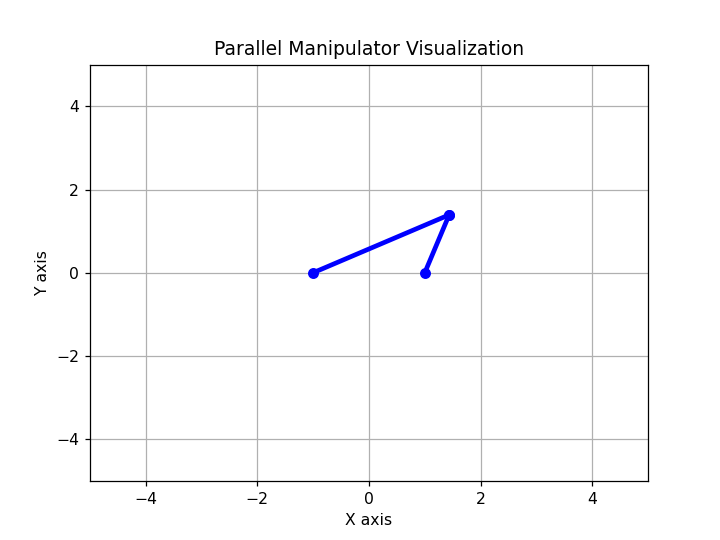

In [5]:

q1_target = q1  

initial_config = [np.pi/8]  # initial q1

# Target joint configurations
target_config = [q1_target]

# Number of interpolation steps
num_steps = 100

interpolated_configs = np.linspace(initial_config, target_config, num_steps)

# Initialize the figure
fig, ax = plt.subplots()
line1, = ax.plot([], [], 'b-o', lw=3)
line2, = ax.plot([], [], 'b-o', lw=3)

# Set small tolerance to stop animation (if needed)
tolerance = 0.01

# Function to calculate forward kinematics (calculate the end-effector position)
def forward_kinematics(q1):
    # Fixed base points
    A = [-l1/2, 0]  # First fixed base point 
    C = [l1/2, 0]   # Second fixed base point
    
    
    B_x = l2 * np.cos(q1)
    B_y = l2 * np.sin(q1)
    
    return A, C, [B_x, B_y]

# Initialize the plot
def init():
    line1.set_data([-l1/2, l2 * np.cos(initial_config[0])], [0, l2 * np.sin(initial_config[0])])  
    line2.set_data([l1/2, l2 * np.cos(initial_config[0])], [0, l2 * np.sin(initial_config[0])])   
    return line1, line2

# Update the plot for each frame
def update(frame):
    q1 = interpolated_configs[frame][0]  

    A, C, B = forward_kinematics(q1)

    # Update the line data to visualize
    line1.set_data([A[0], B[0]], [A[1], B[1]])
    line2.set_data([C[0], B[0]], [C[1], B[1]])

    return line1, line2

# Setting up the animation
ani = animation.FuncAnimation(fig, update, frames=num_steps, init_func=init, blit=True, interval=100)

# Set axis labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Parallel Manipulator Visualization')


ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.grid(True)
plt.show()
